In [3]:
import numpy as np
from datascience import *

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Control Statements Warm up

What is wrong in the following cells?

In [5]:
for i in np.arange(1,10,2):
    print(i)

1
3
5
7
9


In [6]:
for i in np.arange(1,10):
    print(i)

# if condition:
    # block 1
# if condition2:
    # block 2

IndentationError: expected an indented block (<ipython-input-6-69a7baacdec4>, line 2)

What will the following blocks of code print out?

In [7]:
# Cell 1
age = 30
if age > 10:
    print("is older than 10")
if age > 20:
    print("is older than 20")

is older than 10
is older than 20


In [8]:
# Cell 2
age = 30
if age > 10:
    print("is older than 10")
elif age > 20:
    print("is older than 20")

is older than 10


In [9]:
# Cell 3
age = 30
if age > 10:
    print("is older than 10")
else:
    print("is older than 20")

is older than 10


What is wrong with this cell?

In [13]:
for i in np.arange(10):
    if i % 2 == 0:
        print("even")
    else:
        print("odd")

even
odd
even
odd
even
odd
even
odd
even
odd


In [12]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Heads or Tails Experiment

Let's run 1000 experiments where we flip a coin 100 times and see how many times we get heads

In [14]:
coins = make_array('heads', 'tails')
coins

array(['heads', 'tails'], dtype='<U5')

In [29]:
for i in np.arange(10):
    print(i, np.random.choice(coins))

0 heads
1 tails
2 tails
3 heads
4 heads
5 heads
6 tails
7 heads
8 tails
9 tails


In [26]:
print(np.random.choice(coins))
print(np.random.choice(coins))
print(np.random.choice(coins))
print(np.random.choice(coins))
print(np.random.choice(coins))
print(np.random.choice(coins))
print(np.random.choice(coins))
print(np.random.choice(coins))

tails
tails
heads
tails
tails
heads
heads
tails


Let's flip a coin 100 times

*Hint: random.choice*

In [37]:
np.random.choice(coins, 100) 

def random_choice(array_options, number):
    choices = make_array()
    for i in np.arange(number):
        current_choice = np.random.choice(array_options)
        choices = np.append(choices, current_choice)
    return choices

random_choice(coins, 100)

array(['heads', 'tails', 'tails', 'heads', 'heads', 'heads', 'heads',
       'tails', 'heads', 'heads', 'tails', 'tails', 'tails', 'heads',
       'heads', 'heads', 'tails', 'heads', 'heads', 'heads', 'tails',
       'heads', 'heads', 'heads', 'tails', 'heads', 'heads', 'tails',
       'heads', 'tails', 'tails', 'tails', 'heads', 'tails', 'heads',
       'tails', 'heads', 'tails', 'heads', 'tails', 'heads', 'heads',
       'heads', 'heads', 'heads', 'tails', 'tails', 'tails', 'tails',
       'tails', 'heads', 'heads', 'tails', 'tails', 'heads', 'heads',
       'tails', 'tails', 'tails', 'tails', 'heads', 'tails', 'tails',
       'heads', 'tails', 'tails', 'heads', 'heads', 'tails', 'heads',
       'tails', 'heads', 'tails', 'tails', 'heads', 'heads', 'tails',
       'heads', 'tails', 'heads', 'heads', 'tails', 'tails', 'heads',
       'heads', 'heads', 'heads', 'tails', 'heads', 'heads', 'tails',
       'heads', 'tails', 'tails', 'heads', 'heads', 'tails', 'heads',
       'heads', 'tai

How many times did we get heads?

In [40]:
one_hundred_choices = random_choice(coins, 100)

number_heads = 0
for choice in one_hundred_choices:
    if choice == 'heads':
        number_heads = number_heads + 1
number_heads

60

In [42]:
sum(one_hundred_choices == 'heads')

60

Let's repeat this 1000 times:

In [47]:
simulations = make_array()
for i in np.arange(10000):
    simulations = np.append(simulations, sum(random_choice(coins, 100) == 'heads'))
    
#simulations

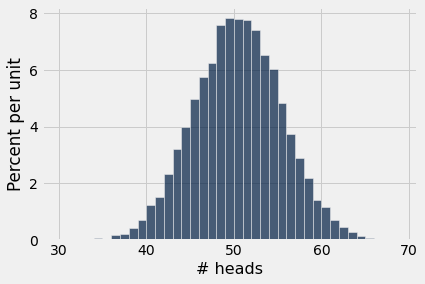

In [48]:
num_heads_tbl = Table().with_columns('# heads', simulations)
num_heads_tbl.hist(bins=np.arange(30,70))

In [54]:
sum(num_heads_tbl.group(0).where('# heads', are.between(40,60)).column('count'))

9532

In [56]:
between_40_60_heads = sum(num_heads_tbl.group(0).where('# heads', are.between(40,60)).column('count'))
between_40_60_heads / num_heads_tbl.num_rows

0.9532

Let's plot the results from the experiments. What type of plot should we use?

In [ ]:
Table().with_columns("# heads", simulations).hist(bins=np.arange(30,70,1))

How many times did we get 40 through 60 heads? What percentage of our simulations do these represent?

(back to slides)

# Monty Hall Simulation

Lets make an array of what is behind each door

In [58]:
goats = make_array('first goat', 'second goat')
hidden_behind_door = np.append(goats, 'car') # Lets add the car 
hidden_behind_door

array(['first goat', 'second goat', 'car'], dtype='<U11')

Let's make a choice. We won't choose a door but rather whats behind the door

In [65]:
# Remember np.random.choice
contestant_choice = np.random.choice(hidden_behind_door)
contestant_choice

'second goat'

In [66]:
def other_goat(a_goat):
    ''' Returns the other goat that wasn't chosen
    '''
    if a_goat == 'first goat':
        return 'second goat'
    elif a_goat == 'second goat':
        return "first goat"

Let's test `other_goat()`

In [73]:
other_goat(other_goat(other_goat(other_goat('first goat'))))

'first goat'

In [68]:
other_goat('second goat')

'first goat'

In [70]:
other_goat('monkey')

'first goat'

What happens next? 
Monty chooses the door to show and we have a remaining door

In [ ]:
monty_choice = ...
remaining_door = ...

But remember, these choices are conditioned on what the contestant chose

In [80]:
if contestant_choice == 'first goat': # one option for contest's choice
    monty_choice = other_goat(contestant_choice)
    remaining_door = 'car'
elif contestant_choice == 'second goat': # second option for contests's choice
    monty_choice = other_goat(contestant_choice)
    remaining_door = 'car'
elif contestant_choice == 'car': # third option for contestants choice
    monty_choice = np.random.choice(goats)
    remaining_door = other_goat(contestant_choice)
    
contestant_choice, monty_choice, remaining_door

('second goat', 'first goat', 'car')

Let's add this to a function so that we can run many simulations of the game

In [116]:
def monty_hall():
    '''
    Simulates one run of monty hall.
    Returns values behind contestant_choice, monty_choice, remaining_door
    '''
    
    contestant_choice = np.random.choice(hidden_behind_door)
    
    if contestant_choice == 'first goat': # one option for contest's choice
        monty_choice = other_goat(contestant_choice)
        remaining_door = 'car'
    elif contestant_choice == 'second goat': # second option for contests's choice
        monty_choice = other_goat(contestant_choice)
        remaining_door = 'car'
    elif contestant_choice == 'car': # third option for contestants choice
        monty_choice = np.random.choice(goats)
        ## In class this was 
        ##remaining_door = other_goat(contestant_choice)
        ## But it would be better as
        remaining_door = other_goat(monty_choice)
        
    return contestant_choice, monty_choice, remaining_door

Now let's play this game once

In [117]:
monty_hall()

('second goat', 'first goat', 'car')

Let's play it another time

In [118]:
monty_hall()

('first goat', 'second goat', 'car')

#### Let's play this game multiple times
How could we do that based on what we learned in today's lecture?

In [119]:
for i in np.arange(100):
    monty_hall()

### Simulations

Let's make a table where we will keep simulations
We want to keep track of the original guess, what was revealed, and what is remaining in the other hidden door

In [120]:
games = Table(['Guess', 'Revealed', 'Remaining'])
games

Guess,Revealed,Remaining


Lets add each time we play to our simulations. 

In [121]:
games.append(monty_hall())

Guess,Revealed,Remaining
second goat,first goat,car


Lets repeat this 3000 times

In [122]:
for i in np.arange(3000):
    games.append(monty_hall())
games.show(5)

Guess,Revealed,Remaining
second goat,first goat,car
first goat,second goat,car
car,first goat,second goat
car,first goat,second goat
second goat,first goat,car


### How could we see what remains for each guess?
what method should we call on the table?

In [123]:
games.pivot("Remaining", "Guess")

/home/jupyter-apoliak@barnard.ed-b8a88/.local/lib/python3.7/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array(tuple(values))


Guess,car,first goat,second goat
car,0,510,494
first goat,1005,0,0
second goat,992,0,0


Let's group on the remaining to decide if we should change?

In [124]:
games.group('Remaining')

Remaining,count
car,1997
first goat,510
second goat,494


In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook()
grader.export("Lecture_10_completed.ipynb", pdf=False)